# Diffusion Equation in 2D

Here we explore numerical solutions to the diffusion (or heat) equation in 2D

\begin{align}
  \frac{\partial u}{\partial t} 
  = \nu\left(\frac{\partial^2 u}{\partial x^2} + \frac{\partial^2 u}{\partial y^2}\right)
\end{align}

where $u = u(x,y,t)$, and the diffusion coefficient, $\nu$, is taken to be constant. 

As with the 1D diffusion equation, here we use the FTCS (forward-time, centered-space) finite difference scheme, which yields

\begin{align}
  u^{n+1}_{i,j} = u^{n}_{i,j} 
  + \frac{\nu\Delta{t}}{(\Delta{x})^2}\left(u^{n}_{i+1,j} - 2u^{n}_{i,j} + u^{n}_{i-1,j}\right)
  + \frac{\nu\Delta{t}}{(\Delta{y})^2}\left(u^{n}_{i,j+1} - 2u^{n}_{i,j} + u^{n}_{i,j-1}\right).
\end{align}

If we use a uniform grid with $h \equiv \Delta{x} = \Delta{y}$, this simplifies to

\begin{align}
  u^{n+1}_{i,j} = u^{n}_{i,j} 
  + \frac{\nu\Delta{t}}{h^2}\left(u^{n}_{i+1,j} + u^{n}_{i-1,j}
  + u^{n}_{i,j+1} + u^{n}_{i,j-1} - 4u^{n}_{i,j}\right).
\end{align}

In [1]:
import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d

In [2]:
# function to evolve the 2D diffusion equation    
def diffusion2D(Lx, Ly, nx, ny):
    """
    this evolves solutions to the 2D diffusion equation using an FTCS scheme
    for a given number of spatial grid points only.
    
    Lx = size of spatial grid in the x direction
    Ly = size of spatial grid in the y direction
    nx = total number of spatial grid points in the x direction
    ny = total number of spatial grid points in the y direction
    """
    # diffusivity
    nu = 0.05
    #print('diffusion coefficient is',nu)

    # setup spatial grid (vertex-centered)
    dx = Lx/(nx-1)   # grid spacing in x direction
    dy = Ly/(ny-1)   # grid spacing in y direction
    x = np.linspace(0, Lx, nx) # x grid
    y = np.linspace(0, Ly, ny) # y grid
    #print('x grid spacing is',dx)
    #print('y grid spacing is',dy)

    # setup time grid
    sigma = 0.25
    dt = sigma*dx*dy/nu # size of timesteps
    nt = 100            # total number of timesteps
    #print('time stepsize is',dt)

    # initialize grid functions
    u = np.zeros((nx,ny))  # grid function at the current step
    un = np.zeros((nx,ny)) # grid function at the previous step

    # initial data
    ax = int(0.25*Lx/dx)  #location of the first jump in x
    ay = int(0.25*Ly/dy)  #location of the first jump in y
    bx = int(0.5*Lx/dx)   #location of the second jump in x
    by = int(0.5*Ly/dy)   #location of the second jump in y
    u[  :  ,   :ay] = 1.  #lower strip
    u[  :  , by:  ] = 1.  #upper strip
    u[  :ax, ay:by] = 1.  #left block
    u[bx:  , ay:by] = 1.  #right block
    u[ax:bx, ay:by] = 2.  #central block
    umax0 = np.amax(u)    #max value (for plotting purposes)

    # function to update plot at each time step
    def uplot(timeStep, X, Y, U, axis):
        axis.cla()                   #clear previous plot
        axis.set_xlim(0, Lx)         #set x limits of plot
        axis.set_ylim(0, Ly)         #set y limits of plot
        axis.set_zlim(0, 1.15*umax0) #set z limits of plot
        axis.set_xlabel('x')         #set x-axis label
        axis.set_ylabel('y')         #set y-axis label
        axis.set_zlabel('u(x,y,t)')  #set z-axis label
        axis.set_title('time step = %.2f' % timeStep) #set title to current timestep
        axis.plot_surface(X, Y, U, rstride=2, cstride=2, cmap='viridis') #plot u vs x,y
        fig.canvas.draw()            #redraw figure
    
    # create figure
    fig = plt.figure(figsize=(7, 7), dpi=100)
    ax1 = fig.gca(projection='3d')
    X, Y = np.meshgrid(x, y)

    # solve
    for n in range(nt):
        # copy solution from previous time step
        un = u.copy()
        # update solution at interior points
        u[1:-1, 1:-1] = un[1:-1, 1:-1] \
            + nu*dt/dx**2*(un[2:  , 1:-1] - 2*un[1:-1, 1:-1] + un[ :-2, 1:-1]) \
            + nu*dt/dy**2*(un[1:-1, 2:  ] - 2*un[1:-1, 1:-1] + un[1:-1,  :-2])
        # update solution at boundary points
        u[ 0, :] = 1. #u at x=0
        u[-1, :] = 1. #u at x=L
        u[ :, 0] = 1. #u at y=0
        u[ :,-1] = 1. #u at y=L

        #plot configuration
        uplot(n, X, Y, u, ax1)

<IPython.core.display.Javascript object>


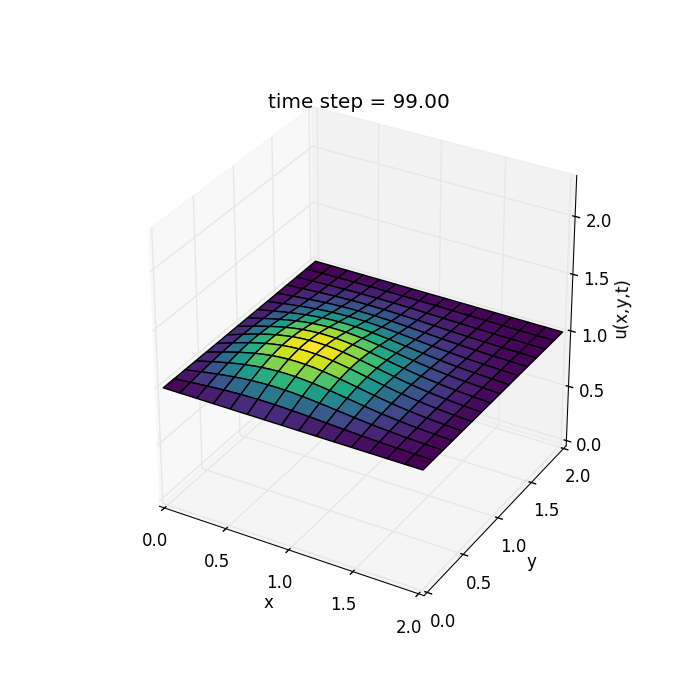

In [3]:
diffusion2D(2., 2., 31, 31)